In [1]:
import pandas as pd
import os

path = r'D:\elice_python\GAS_5\pytest_machine'
os.chdir(path)

In [2]:
data = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
data.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.shape

(768, 9)

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

print(X.shape, y.shape)

(768, 8) (768,)


In [10]:
correlation_matrix = data.corr().round(2)
print(correlation_matrix)

           pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  \
pregnant       1.00    0.13      0.14      -0.08    -0.07  0.02     -0.03   
plasma         0.13    1.00      0.15       0.06     0.33  0.22      0.14   
pressure       0.14    0.15      1.00       0.21     0.09  0.28      0.04   
thickness     -0.08    0.06      0.21       1.00     0.44  0.39      0.18   
insulin       -0.07    0.33      0.09       0.44     1.00  0.20      0.19   
bmi            0.02    0.22      0.28       0.39     0.20  1.00      0.14   
pedigree      -0.03    0.14      0.04       0.18     0.19  0.14      1.00   
age            0.54    0.26      0.24      -0.11    -0.04  0.04      0.03   
diabetes       0.22    0.47      0.07       0.07     0.13  0.29      0.17   

            age  diabetes  
pregnant   0.54      0.22  
plasma     0.26      0.47  
pressure   0.24      0.07  
thickness -0.11      0.07  
insulin   -0.04      0.13  
bmi        0.04      0.29  
pedigree   0.03      0.17  
age  

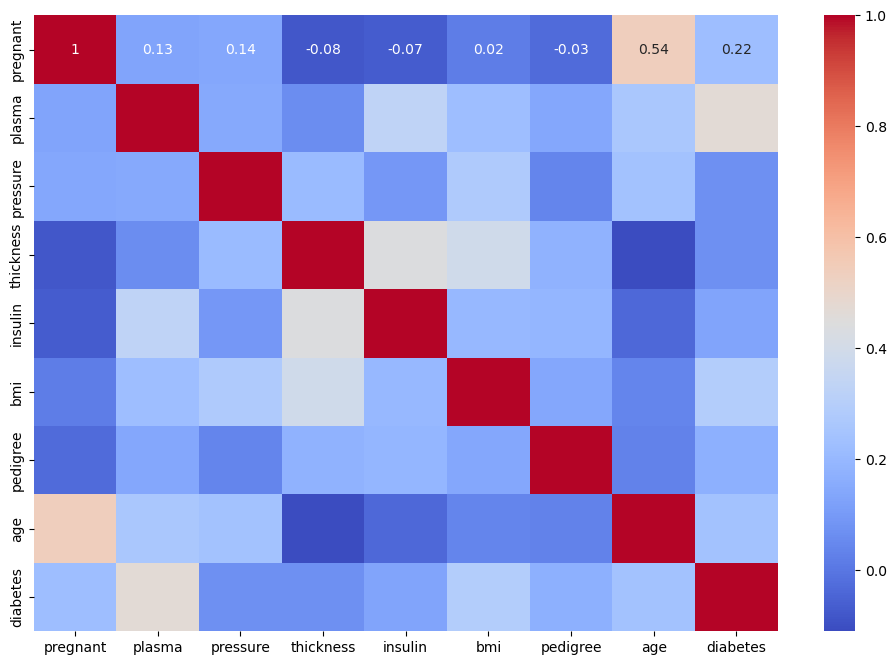

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

C:\Users\Caelu\AppData\Local\Temp\ipykernel_18492\2967314755.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_corr_matrix = correlation_matrix.applymap(lambda x: x if abs(x) >= 0.0 and abs(x)!=1 else 0)
c:\Users\Caelu\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


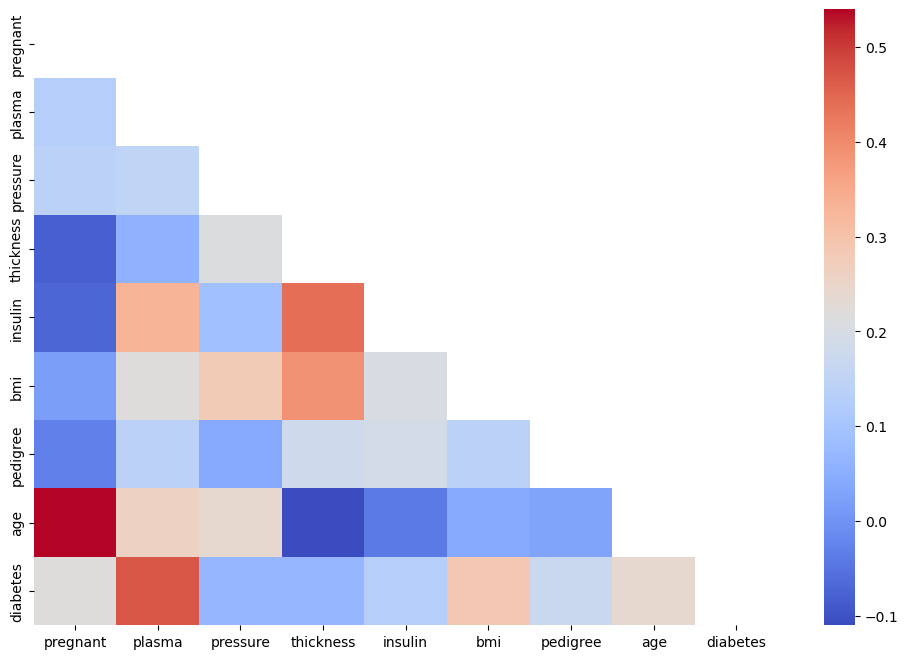

In [23]:
import numpy as np
filtered_corr_matrix = correlation_matrix.applymap(lambda x: x if abs(x) >= 0.0 and abs(x)!=1 else 0)
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(filtered_corr_matrix, dtype=bool))
sns.heatmap(data=filtered_corr_matrix, annot=True, cmap='coolwarm', mask=mask)
# sns.heatmap(data=filtered_corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [32]:
data.corr().iloc[-1:]


,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.0


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)

In [78]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.fit_transform(X_test)

In [79]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [53]:
from sklearn.svm import SVC

svc_mms_list=[]
svc_ss_list=[]

for c in np.arange(0.01,10, 0.01) :
    svc = SVC(C=0.5, gamma='auto', kernel='rbf')
    svc_mms = svc.fit(X_train_mms, y_train)
    # print(f'''
    #     train data score : {svc_mms.score(X_train_mms, y_train)}
    #     test data score : {svc_mms.score(X_test_mms, y_test)}
    #     ''')
    svc_mms_list.append(svc_mms.score(X_test_mms, y_test))
    svc_ss = svc.fit(X_train_ss, y_train)
    # print(f'''
    #     train data score : {svc_ss.score(X_train_mms, y_train)}
    #     test data score : {svc_ss.score(X_test_mms, y_test)}
    #     ''')
    svc_ss_list.append(svc_ss.score(X_test_ss, y_test))

print(np.argmax(svc_mms_list), max(svc_mms_list))
print(np.argmax(svc_ss_list), max(svc_ss_list))    

0 0.7291666666666666
0 0.7447916666666666


In [59]:
from sklearn.linear_model import LogisticRegression

lr_mms_list=[]
lr_ss_list=[]

for c in np.arange(0.01,10, 0.01) :
    lr = LogisticRegression(C=c, solver='liblinear', max_iter=10000,penalty='l1')
    lr_mms = lr.fit(X_train_mms, y_train)
    # print(f'''
    #     train data score : {svc_mms.score(X_train_mms, y_train)}
    #     test data score : {svc_mms.score(X_test_mms, y_test)}
    #     ''')
    lr_mms_list.append(lr_mms.score(X_test_mms, y_test))
    lr_ss = lr.fit(X_train_ss, y_train)
    # print(f'''
    #     train data score : {svc_ss.score(X_train_mms, y_train)}
    #     test data score : {svc_ss.score(X_test_mms, y_test)}
    #     ''')
    lr_ss_list.append(lr_ss.score(X_test_ss, y_test))

print(np.argmax(lr_mms_list), max(lr_mms_list))
print(np.argmax(lr_ss_list), max(lr_ss_list))    

458 0.7604166666666666
2 0.7395833333333334


In [61]:
Q1 = data['insulin'].quantile(0.25)
Q3 = data['insulin'].quantile(0.75)
IQR = Q3 -Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

data_no_outliers = data[(data['insulin'] >= lower_bound) & (data['insulin'] <= upper_bound)]


In [62]:
X_no = data_no_outliers.iloc[:,:-1]
y_no = data_no_outliers.iloc[:,-1]


In [74]:
X_no_train, X_no_test, y_no_train, y_no_test = train_test_split(X_no,y_no,stratify=y_no, random_state=42)

In [75]:
X_no_train_mms = mms.fit_transform(X_no_train)
X_no_test_mms = mms.fit_transform(X_no_test)

X_no_train_ss = ss.fit_transform(X_no_train)
X_no_test_ss = ss.fit_transform(X_no_test)

In [80]:
import numpy as np
from sklearn.svm import SVC

# 데이터셋 크기 확인
print(f"X_no_train_mms shape: {X_no_train_mms.shape}")
print(f"y_no_train shape: {y_no_train.shape}")
print(f"X_test_mms shape: {X_test_mms.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"X_no_train_ss shape: {X_no_train_ss.shape}")
print(f"X_test_ss shape: {X_test_ss.shape}")

# 데이터셋 크기가 일치하는지 확인
if X_no_train_mms.shape[0] != y_no_train.shape[0]:
    print("X_no_train_mms와 y_no_train의 샘플 수가 일치하지 않습니다.")
if X_test_mms.shape[0] != y_test.shape[0]:
    print("X_test_mms와 y_test의 샘플 수가 일치하지 않습니다.")
if X_no_train_ss.shape[0] != y_no_train.shape[0]:
    print("X_no_train_ss와 y_no_train의 샘플 수가 일치하지 않습니다.")
if X_test_ss.shape[0] != y_test.shape[0]:
    print("X_test_ss와 y_test의 샘플 수가 일치하지 않습니다.")

# 오류가 없을 경우에만 모델 학습 및 평가
svc_no_mms_list = []
svc_no_ss_list = []

for c in np.arange(0.01, 10, 0.01):
    svc = SVC(C=c, gamma='auto', kernel='rbf')  # C 값을 반복문에서 설정
    
    svc_no_mms = svc.fit(X_no_train_mms, y_no_train)
    svc_no_mms_list.append(svc_no_mms.score(X_test_mms, y_test))  # svc_no_mms 사용
    
    svc_no_ss = svc.fit(X_no_train_ss, y_no_train)
    svc_no_ss_list.append(svc_no_ss.score(X_test_ss, y_test))  # svc_no_ss 사용

print(np.argmax(svc_no_mms_list), max(svc_no_mms_list))
print(np.argmax(svc_no_ss_list), max(svc_no_ss_list))


X_no_train_mms shape: (550, 8)
y_no_train shape: (550,)
X_test_mms shape: (192, 8)
y_test shape: (192,)
X_no_train_ss shape: (550, 8)
X_test_ss shape: (192, 8)
85 0.75
600 0.8125


In [81]:
from sklearn.linear_model import LogisticRegression

lr_no_mms_list = []
lr_no_ss_list = []

for c in np.arange(0.01, 10, 0.01):
    lr = LogisticRegression(C=c, solver='liblinear', max_iter=10000,penalty='l1')
    
    lr_no_mms = lr.fit(X_no_train_mms, y_no_train)
    lr_no_mms_list.append(lr_no_mms.score(X_test_mms, y_test))  # svc_no_mms 사용
    
    lr_no_ss = lr.fit(X_no_train_ss, y_no_train)
    lr_no_ss_list.append(lr_no_ss.score(X_test_ss, y_test))  # svc_no_ss 사용

print(np.argmax(lr_no_mms_list), max(lr_no_mms_list))
print(np.argmax(lr_no_ss_list), max(lr_no_ss_list))

102 0.7447916666666666
168 0.7395833333333334
